In [2]:
! pip install Numpy

Top 4 features selected by RFE: MedInc, AveBedrms, Latitude, Longitude
Mean Squared Error: 0.5477
R-squared: 0.5887


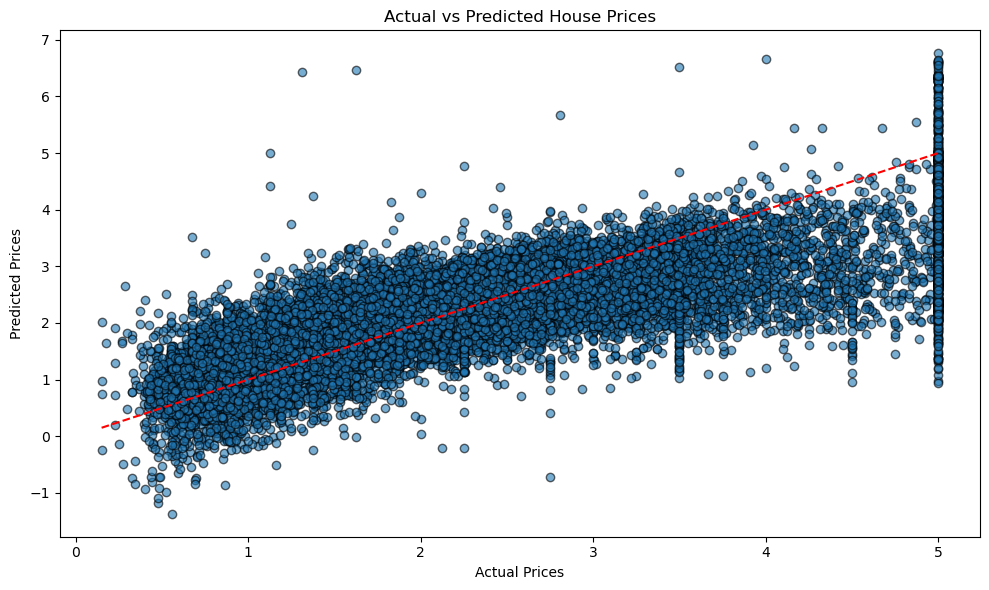

In [5]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the California housing dataset
data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# Initialize the linear regression model
model = LinearRegression()

# Apply RFE to select top 4 features
rfe = RFE(model, n_features_to_select=4)
rfe.fit(X, y)

# Get top features
top_features = X.columns[rfe.support_]
print(f"Top 4 features selected by RFE: {', '.join(top_features)}")

# Train model on selected features
X_selected = X[top_features]
model.fit(X_selected, y)

# Predict and evaluate
y_pred = model.predict(X_selected)
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R-squared: {r2:.4f}")

# Plot actual vs predicted
plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred, alpha=0.6, edgecolor='k')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted House Prices')
plt.tight_layout()
plt.show()
